In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np
import tensorflow as keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

!pip install tensorflow-addons

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model
import tensorflow_addons as tfa
from tensorflow.nn import relu6

import matplotlib.pyplot as plt
import gc

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()# mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(y_train)
#print(np.shape(x_train))



#del a
#n = gc.collect()

#plt.imshow(x_test[0,:,:,:])
#plt.show()

#x_train=x_train.reshape((-1, 32*32*3))
#x_test=x_test.reshape((-1, 32*32*3))
#print(np.shape(x_train))

#x_train=x_train[0:30000,:]
#y_train=y_train[0:30000]

x_train2=(x_train).copy()
x_test2=(x_test).copy()

'''
np.random.seed(1000)
a=(np.array(np.random.rand(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)>0.3)).astype(float)
#a[:,0:16,:]=1
#a[:,16:32,:]=0
a=np.tile(a,(1,1,1,3))
x_train=np.maximum(a,x_train)
#x_train=x_train+a*0.05
#x_train=np.maximum(0,x_train)
#x_train=np.minimum(1.0,x_train)
#print(x_train)

#np.random.seed(1000)
a=(np.array(np.random.rand(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)>0.3)).astype(float)
#a[:,0:16,:]=1
#a[:,16:32,:]=0
a=np.tile(a,(1,1,1,3))
x_test=np.maximum(a,x_test)
#'''

print(np.shape(x_train))
print(np.shape(x_train2))

#x_train2=((np.floor(x_train2*(254/255)*32)).astype(int)).astype(np.float16)/32
#x_test2=((np.floor(x_test2*(254/255)*32)).astype(int)).astype(np.float16)/32
#print(x_train2)

#plt.hist(x_test2.flatten(),bins=100)

#y_train2 = np.zeros((y_train.size, y_train.max()+1), dtype=int)
#y_train2[np.arange(y_train.size),y_train] = 1 
#y_train2[:,:]=0
#x_train2=np.concatenate((x_train2,307.2*y_train2),axis=1)
#print(np.shape(x_train2))
#print(np.shape(y_train2))

#y_test2 = np.zeros((y_test.size, y_test.max()+1), dtype=int)
#y_test2[np.arange(y_test.size),y_test] = 1
#x_test2[:,:]=0 
#x_test2=np.concatenate((x_test2,307.2*y_test2),axis=1)
#print(np.shape(x_test2))
#print(np.shape(y_test2))

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [ ]:
print(x_train)
print(x_test)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
dim=1
x_in=Input(shape=(32,32,3*dim))
#x_in2=tf.image.resize(x_in, [16, 16])
#x_in2=tf.keras.layers.RandomFlip("horizontal_and_vertical")(x_in2)
#x_inb=tf.keras.layers.BatchNormalization()(x_in)
initializer = tf.keras.initializers.glorot_uniform()#HeNormal()#HeUniform()#HeNormal()

x=Conv2D(16,kernel_size = (5,1), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same', use_bias=True,input_shape=(32, 32, 3), kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_in,-x_in]))#,kernel_constraint=tf.keras.constraints.NonNeg()#8
#x_a = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=None, padding='same')(Concatenate(axis=3)([x, -x]))
#x_b=tf.keras.layers.UpSampling2D(size=(2, 2))(x_a)
#x_a=tf.keras.layers.Dropout(.2)(x)
x_b=tf.keras.layers.BatchNormalization()(x)
x_b=x_b+0.5

x_1=Conv2D(16,kernel_size = (1,5), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_b,-x_b]))
#x_1a = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=None, padding='same')(Concatenate(axis=3)([x_1, -x_1]))
#x_1b=tf.keras.layers.UpSampling2D(size=(2, 2))(x_1a)
#x_1a=tf.keras.layers.Dropout(.2)(x_1)
x_1b=tf.keras.layers.BatchNormalization()(x_1)
x_1b=x_1b+0.5

x_2=Conv2D(16,kernel_size = (1,5), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_1b,-x_1b]))
#x_2a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_2, -x_2]))
#x_2b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_2a)
#x_2a=tf.keras.layers.Dropout(.2)(x_2)
x_2b=tf.keras.layers.BatchNormalization()(x_2)
x_2b=x_2b+0.5

x_3=Conv2D(16,kernel_size = (5,1), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_2b,-x_2b]))
#x_3a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_3, -x_3]))
#x_3b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_3a)x_3b=tf.keras.layers.Dropout(.2)(x_3)
#x_3a=tf.keras.layers.Dropout(.2)(x_3)
x_3b=tf.keras.layers.BatchNormalization()(x_3)
x_3b=x_3b+0.5

x_4=Conv2D(16,kernel_size = (5,1), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_3b,-x_3b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_4a=tf.keras.layers.Dropout(.2)(x_4)
x_4b=tf.keras.layers.BatchNormalization()(x_4)
x_4b=x_4b+0.5

x_5=Conv2D(16,kernel_size = (1,5), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_4b,-x_4b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_5b=tf.keras.layers.Dropout(.2)(x_5)
x_5b=tf.keras.layers.BatchNormalization()(x_5)
x_5b=x_5b+0.5

x_6=Conv2D(16,kernel_size = (1,5), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_5b,-x_5b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_6b=tf.keras.layers.Dropout(.2)(x_6)
x_6b=tf.keras.layers.BatchNormalization()(x_6)
x_6b=x_6b+0.5

x_7=Conv2D(16,kernel_size = (5,1), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_6b,-x_6b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_7b=tf.keras.layers.Dropout(.2)(x_7)
x_7b=tf.keras.layers.BatchNormalization()(x_7)
x_7b=x_7b+0.5

x_8=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_7b,-x_7b,x_b,-x_b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_8b=tf.keras.layers.Dropout(.2)(x_8)
x_8b=tf.keras.layers.BatchNormalization()(x_8)

x_9=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_8b,-x_8b,x_b,-x_b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_9b=tf.keras.layers.Dropout(.2)(x_9)
x_9b=tf.keras.layers.BatchNormalization()(x_9)

x_10=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_9b,-x_9b,x_b,-x_b]))
#x_4a = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_4, -x_4]))
#x_4b=tf.keras.layers.UpSampling2D(size=(4, 4))(x_4a)
#x_10b=tf.keras.layers.Dropout(.2)(x_10)
x_10b=tf.keras.layers.BatchNormalization()(x_10)

#x_7b=x_7b[:,8:24,8:24,:]
x_10c = tf.keras.layers.MaxPooling2D(pool_size=(4, 4),strides=None, padding='same')(Concatenate(axis=3)([x_7b, -x_7b]))

x_com=Conv2D(16,kernel_size = (1,8), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='valid',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_10c,-x_10c]))
x_coma=tf.keras.layers.BatchNormalization()(x_com)
x_coma=x_coma+0.5
x_com1=Conv2D(16,kernel_size = (8,1), strides = (1,1), activation='relu',kernel_initializer=initializer, padding='valid',use_bias=True, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_coma,-x_coma]))
x_com1a=tf.keras.layers.BatchNormalization()(x_com1)
x_com1a=x_com1a+0.5

x_11=tf.keras.layers.Flatten()(x_com1a)
x_11a = Dense(32, activation='relu',kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_11, -x_11]))
x_11aa=(x_11a)#/6/2)
x_11b = Dense(32, activation='relu',kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_11aa, -x_11aa]))
x_11bb=(x_11b)#/6#-0.5/6
x_11c = Dense(10, activation='sigmoid', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_11bb, -x_11bb]))#tfa.activations.sparsemax
#x_11c = Dense(10, activation='linear')(Concatenate(axis=1)([x_11bb]))#tfa.activations.sparsemax
x_out4=x_11c
x_out4 = tf.identity(x_out4, name="cls")

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 tf.math.negative (TFOpLambda)  (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 32, 32, 6)    0           ['input_1[0][0]',                
                                                                  'tf.math.negative[0][0]']       
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   496         ['concatenate[0][0]']      

In [ ]:
import keras
class TrainingPlot(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        #self.acc.append(logs.get('tf.identity_1_accuracy'))#accuracy'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        #self.val_acc.append(logs.get('val_tf.identity_1_accuracy'))#val_accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        N = np.arange(0, len(self.losses))
        plt.figure('result')
        #plt.plot(N, self.losses, label = "train_loss")
        plt.plot(N, self.acc, label = "train_accuracy")
        #plt.plot(N, self.val_losses, label = "val_loss")
        plt.plot(N, self.val_acc, label = "val_accuracy")
        plt.grid()
        plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend()
        plt.show()

In [ ]:

from keras.utils.np_utils import to_categorical

n = gc.collect()

#model = Model(inputs=x_in, outputs=[x_out3,x_out4])
model = Model(inputs=x_in, outputs=x_out4)

#'''
for i in range(0,len(model.layers)):
    if model.layers[i].name.startswith('conv2d'):
        w2=model.layers[i].weights
        w=w2[0].numpy()
        #print(w2)
        #print(np.shape(w))
        m=np.mean(w[w>0])
        s=np.sum(w)
        w[w<=0]=0
        w[w>0]=m
        #w2[0].set_weights(w)
        model.layers[i].set_weights([w,w2[1]])
    #model.layers[i].trainable == True
#'''

losses = {'tf.identity':
 "mae",'tf.identity_1':
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
}
lossWeights = { 20.0,  1.0}

BATCH_SIZE=1000 #1000

steps_per_epoch = len(x_train) // BATCH_SIZE
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=0.01,
    maximal_learning_rate=0.1,
    scale_fn=lambda x:  1/(1.2**(x-1)),#1/(2.**(x-1)),
    step_size= 2 * steps_per_epoch
)

#gradients = tf.gradients(tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.TRAINABLE_VARIABLES), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
#grads_and_vars = [(tf.clip_by_norm(grad, 1), var)  for grad, var in gradients]
#train_op = tf.train.GradientDescentOptimizer(learning_rate=1e-4).apply_gradients

# compile the keras model
#optimizer = keras.optimizers.Adam(lr=0.01)#lr=0.001#0.0001
optimizer = keras.optimizers.SGD(learning_rate=1)#,clipvalue=0.01)#.apply_gradients#clr)#learning_rate=0.001)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)#.apply_gradients#clr)#learning_rate=0.001)

#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])#optimizer='adam'
##model.compile(loss='mae', optimizer=optimizer)#, metrics=['accuracy']
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']
#model.compile(loss='mae', optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']


#grads_and_vars = optimizer.compute_gradients(tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_train,x_out4))
#grads, _ = list(zip(*grads_and_vars))
#norms = tf.global_norm(grads)
#gradnorm_s = tf.summary.scalar('gradient norm', norms)
#train_op = optimizer.apply_gradients(grads_and_vars)

#model.compile(loss=losses, optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']
# fit the keras model on the dataset
#model.fit(x=x_train, y=y_train, verbose=1, epochs=150, batch_size=32, validation_data=(x_test, y_test))#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
#model.fit(x=x_train, y={'tf.identity':x_train2,'tf.identity_1':y_train}, verbose=1, epochs=150, batch_size=100, validation_data=(x_test, {'tf.identity':x_test2,'tf.identity_1':y_test}),shuffle=True,callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
#model.fit(x=x_train, y=6*to_categorical(y_train,num_classes=10)-3, verbose=1, epochs=150, batch_size=BATCH_SIZE, validation_data=(x_test, 6*to_categorical(y_test,num_classes=10)-3),shuffle=True, callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
model.fit(x=x_train, y=y_train, verbose=1, epochs=150, batch_size=BATCH_SIZE, validation_data=(x_test, y_test),shuffle=True, callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000

# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
_, accuracy = model.evaluate(x_test, x_test2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
 6/50 [==>...........................] - ETA: 8s - loss: 1.5984 - accuracy: 0.7860

50/50 [==============================] - ETA: 0s - loss: 1.5890 - accuracy: 0.7970

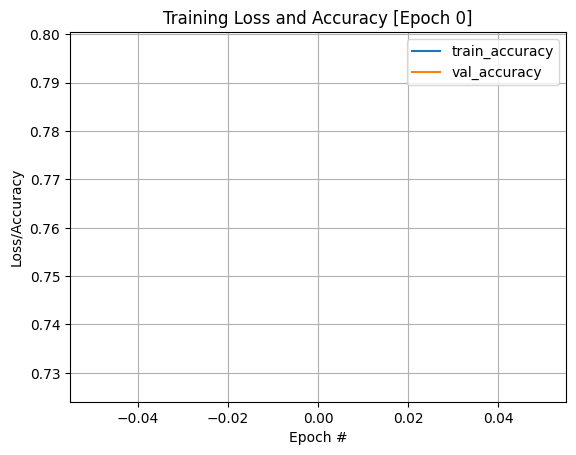

50/50 [==============================] - 13s 228ms/step - loss: 1.5890 - accuracy: 0.7970 - val_loss: 1.6669 - val_accuracy: 0.7275
Epoch 2/150
50/50 [==============================] - ETA: 0s - loss: 1.5800 - accuracy: 0.8054

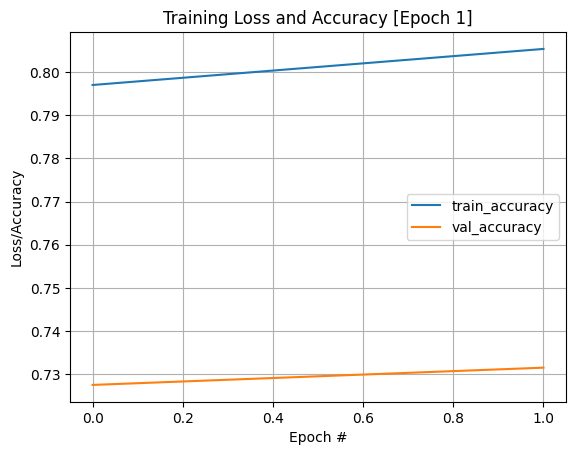

50/50 [==============================] - 11s 213ms/step - loss: 1.5800 - accuracy: 0.8054 - val_loss: 1.6671 - val_accuracy: 0.7315
Epoch 3/150
50/50 [==============================] - ETA: 0s - loss: 1.5772 - accuracy: 0.8088

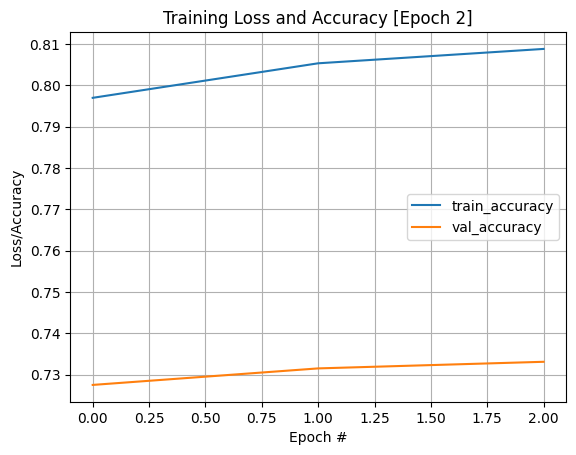

50/50 [==============================] - 11s 216ms/step - loss: 1.5772 - accuracy: 0.8088 - val_loss: 1.6679 - val_accuracy: 0.7331
Epoch 4/150
50/50 [==============================] - ETA: 0s - loss: 1.5749 - accuracy: 0.8097

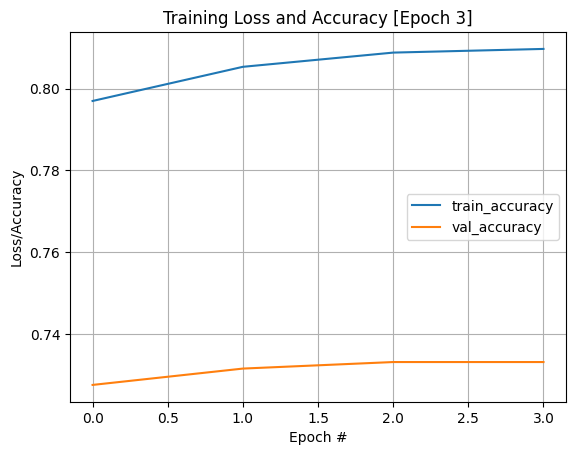

50/50 [==============================] - 11s 213ms/step - loss: 1.5749 - accuracy: 0.8097 - val_loss: 1.6676 - val_accuracy: 0.7331
Epoch 5/150
50/50 [==============================] - ETA: 0s - loss: 1.5735 - accuracy: 0.8109

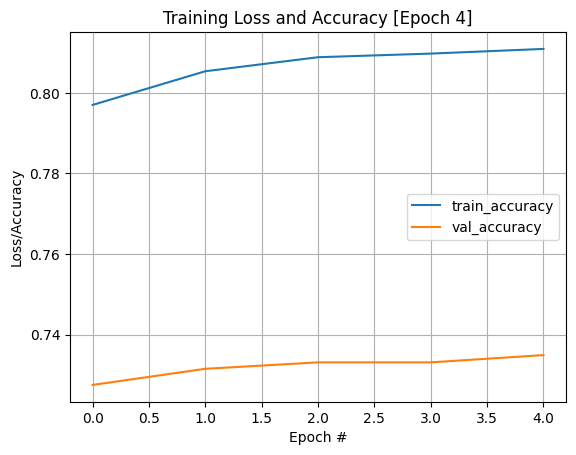

50/50 [==============================] - 10s 210ms/step - loss: 1.5735 - accuracy: 0.8109 - val_loss: 1.6682 - val_accuracy: 0.7349
Epoch 6/150
50/50 [==============================] - ETA: 0s - loss: 1.5718 - accuracy: 0.8116

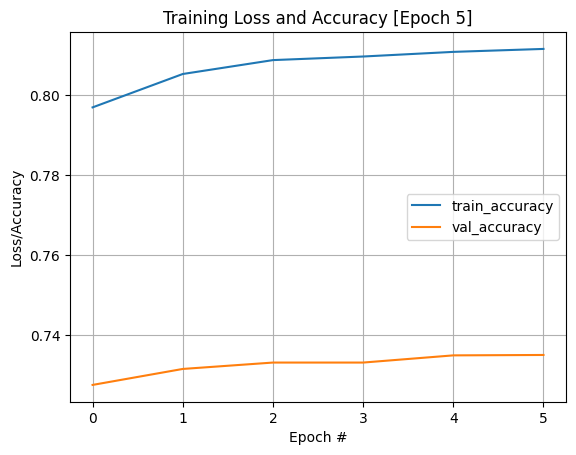

50/50 [==============================] - 10s 210ms/step - loss: 1.5718 - accuracy: 0.8116 - val_loss: 1.6692 - val_accuracy: 0.7350
Epoch 7/150
50/50 [==============================] - ETA: 0s - loss: 1.5708 - accuracy: 0.8119

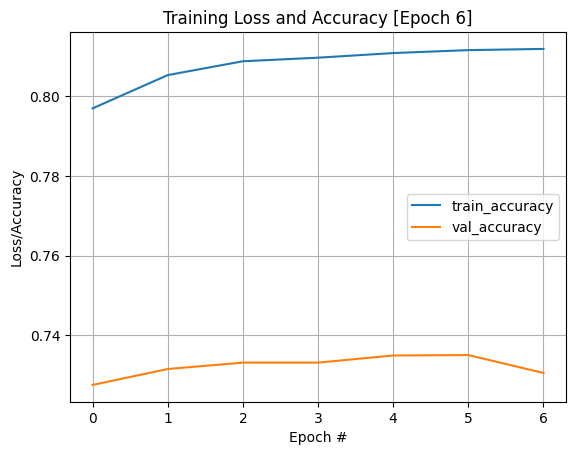

50/50 [==============================] - 10s 210ms/step - loss: 1.5708 - accuracy: 0.8119 - val_loss: 1.6691 - val_accuracy: 0.7305
Epoch 8/150
50/50 [==============================] - ETA: 0s - loss: 1.5700 - accuracy: 0.8127

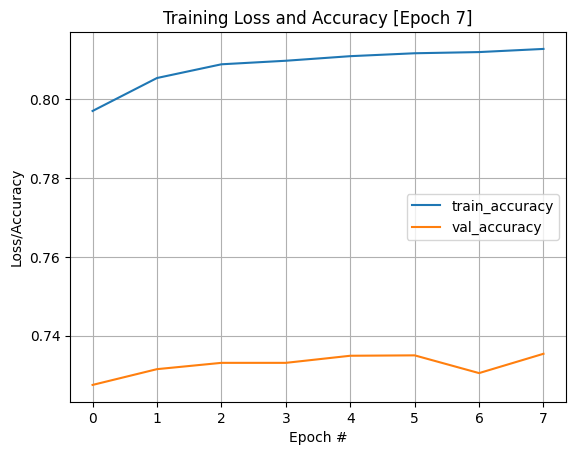

50/50 [==============================] - 11s 212ms/step - loss: 1.5700 - accuracy: 0.8127 - val_loss: 1.6696 - val_accuracy: 0.7354
Epoch 9/150
50/50 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.8130

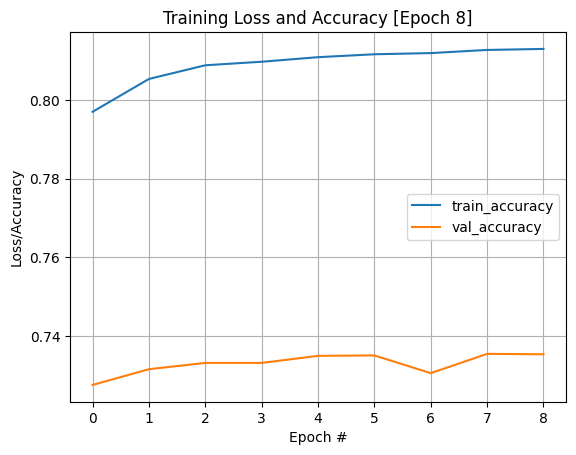

50/50 [==============================] - 11s 211ms/step - loss: 1.5691 - accuracy: 0.8130 - val_loss: 1.6695 - val_accuracy: 0.7353
Epoch 10/150
50/50 [==============================] - ETA: 0s - loss: 1.5683 - accuracy: 0.8129

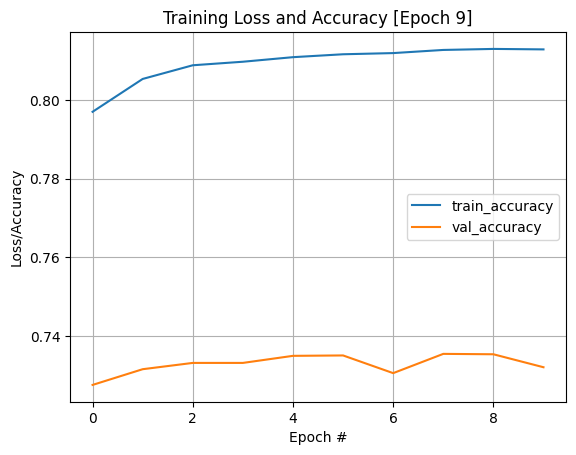

50/50 [==============================] - 11s 212ms/step - loss: 1.5683 - accuracy: 0.8129 - val_loss: 1.6699 - val_accuracy: 0.7320
Epoch 11/150
50/50 [==============================] - ETA: 0s - loss: 1.5679 - accuracy: 0.8126

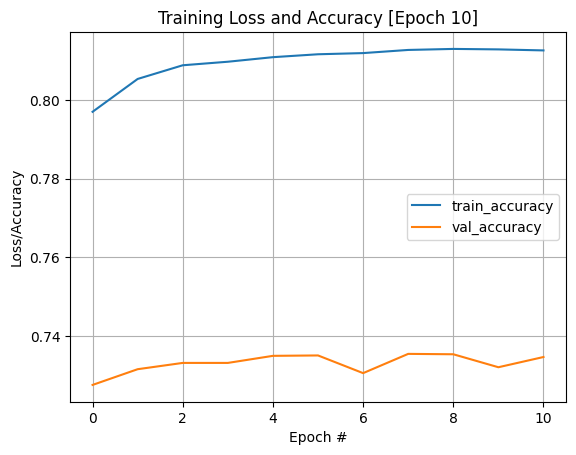

50/50 [==============================] - 11s 212ms/step - loss: 1.5679 - accuracy: 0.8126 - val_loss: 1.6703 - val_accuracy: 0.7346
Epoch 12/150
50/50 [==============================] - ETA: 0s - loss: 1.5676 - accuracy: 0.8133

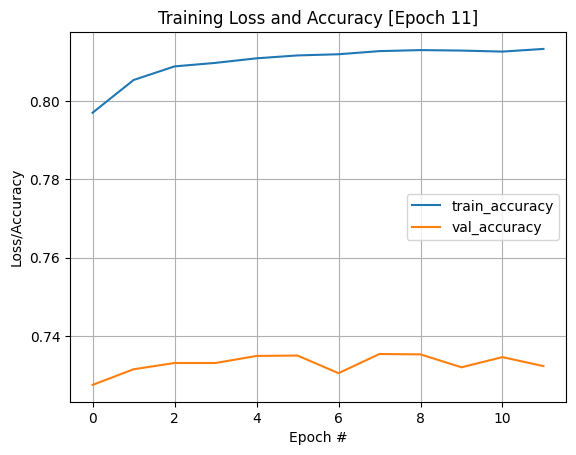

50/50 [==============================] - 11s 212ms/step - loss: 1.5676 - accuracy: 0.8133 - val_loss: 1.6715 - val_accuracy: 0.7323
Epoch 13/150
50/50 [==============================] - ETA: 0s - loss: 1.5668 - accuracy: 0.8137

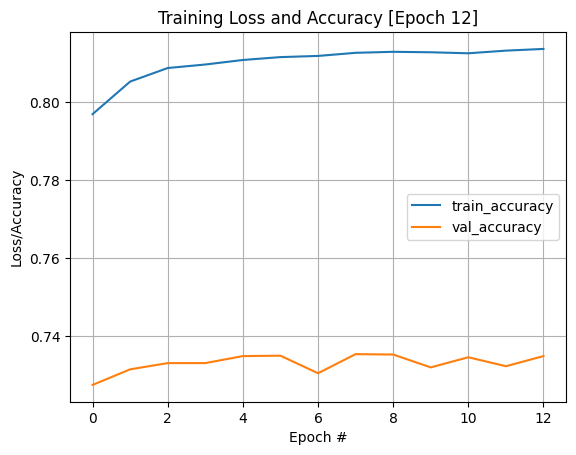

50/50 [==============================] - 11s 211ms/step - loss: 1.5668 - accuracy: 0.8137 - val_loss: 1.6714 - val_accuracy: 0.7349
Epoch 14/150
50/50 [==============================] - ETA: 0s - loss: 1.5660 - accuracy: 0.8143

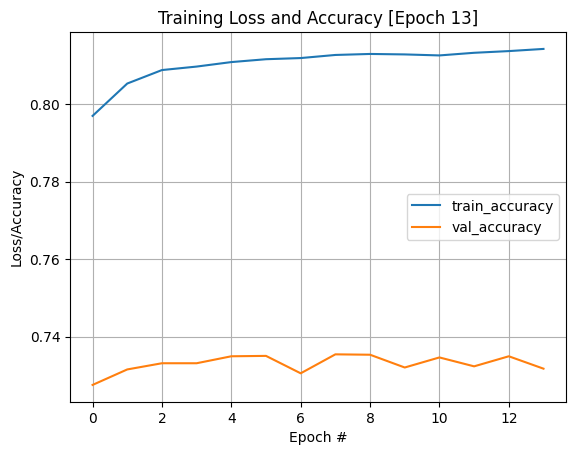

50/50 [==============================] - 11s 211ms/step - loss: 1.5660 - accuracy: 0.8143 - val_loss: 1.6714 - val_accuracy: 0.7317
Epoch 15/150
50/50 [==============================] - ETA: 0s - loss: 1.5658 - accuracy: 0.8147

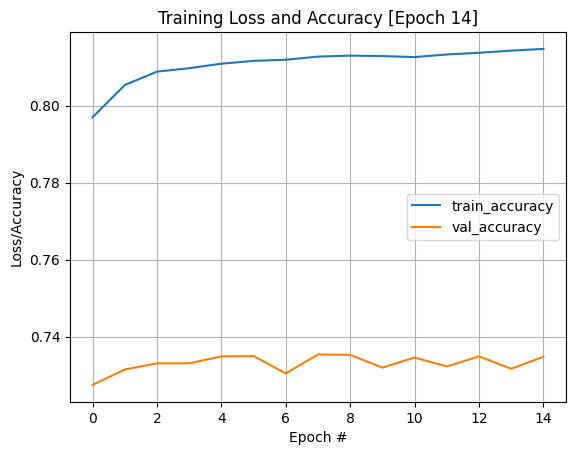

50/50 [==============================] - 11s 214ms/step - loss: 1.5658 - accuracy: 0.8147 - val_loss: 1.6718 - val_accuracy: 0.7348
Epoch 16/150
20/50 [===========>..................] - ETA: 5s - loss: 1.5645 - accuracy: 0.8152

KeyboardInterrupt: ignored

In [ ]:

from keras.utils.np_utils import to_categorical

n = gc.collect()

#model = Model(inputs=x_in, outputs=[x_out3,x_out4])
model = Model(inputs=x_in, outputs=x_out4)

'''
for i in range(0,len(model.layers)):
    if model.layers[i].name.startswith('conv2d'):
        w2=model.layers[i].weights
        w=w2[0].numpy()
        #print(w2)
        #print(np.shape(w))
        m=np.mean(w[w>0])
        s=np.sum(w)
        w[w<=0]=0
        w[w>0]=m
        #w2[0].set_weights(w)
        model.layers[i].set_weights([w,w2[1]])
    #model.layers[i].trainable == True
#'''

losses = {'tf.identity':
 "mae",'tf.identity_1':
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
}
lossWeights = { 20.0,  1.0}

BATCH_SIZE=1000 #1000

steps_per_epoch = len(x_train) // BATCH_SIZE
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=0.01,
    maximal_learning_rate=0.1,
    scale_fn=lambda x:  1/(1.2**(x-1)),#1/(2.**(x-1)),
    step_size= 2 * steps_per_epoch
)

#gradients = tf.gradients(tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.TRAINABLE_VARIABLES), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
#grads_and_vars = [(tf.clip_by_norm(grad, 1), var)  for grad, var in gradients]
#train_op = tf.train.GradientDescentOptimizer(learning_rate=1e-4).apply_gradients

# compile the keras model
#optimizer = keras.optimizers.Adam(lr=0.01)#lr=0.001#0.0001
optimizer = keras.optimizers.SGD(learning_rate=0.1)#,clipvalue=0.01)#.apply_gradients#clr)#learning_rate=0.001)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)#.apply_gradients#clr)#learning_rate=0.001)

#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])#optimizer='adam'
##model.compile(loss='mae', optimizer=optimizer)#, metrics=['accuracy']
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']
#model.compile(loss='mae', optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']


#grads_and_vars = optimizer.compute_gradients(tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_train,x_out4))
#grads, _ = list(zip(*grads_and_vars))
#norms = tf.global_norm(grads)
#gradnorm_s = tf.summary.scalar('gradient norm', norms)
#train_op = optimizer.apply_gradients(grads_and_vars)

#model.compile(loss=losses, optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']
# fit the keras model on the dataset
#model.fit(x=x_train, y=y_train, verbose=1, epochs=150, batch_size=32, validation_data=(x_test, y_test))#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
#model.fit(x=x_train, y={'tf.identity':x_train2,'tf.identity_1':y_train}, verbose=1, epochs=150, batch_size=100, validation_data=(x_test, {'tf.identity':x_test2,'tf.identity_1':y_test}),shuffle=True,callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
#model.fit(x=x_train, y=6*to_categorical(y_train,num_classes=10)-3, verbose=1, epochs=150, batch_size=BATCH_SIZE, validation_data=(x_test, 6*to_categorical(y_test,num_classes=10)-3),shuffle=True, callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
model.fit(x=x_train, y=y_train, verbose=1, epochs=20, batch_size=BATCH_SIZE, validation_data=(x_test, y_test),shuffle=True, callbacks=[TrainingPlot()])#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000

# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
_, accuracy = model.evaluate(x_test, x_test2)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint1')

313/313 [==============================] - 1s 3ms/step
(10000, 32)


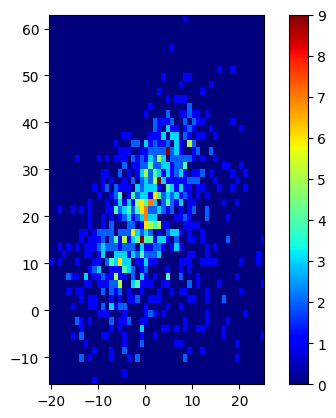

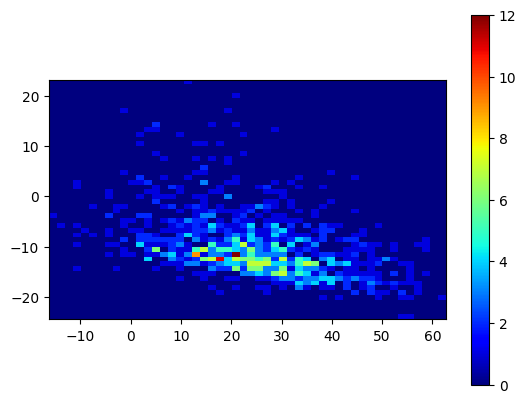

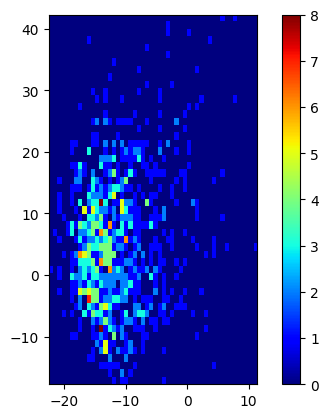

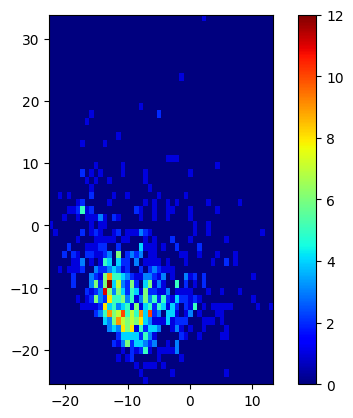

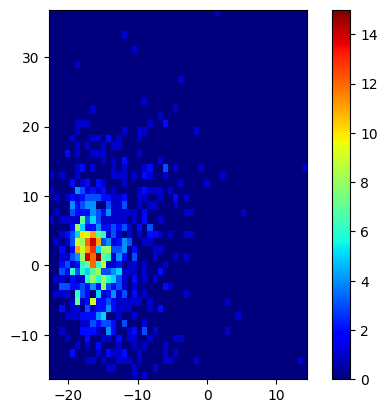

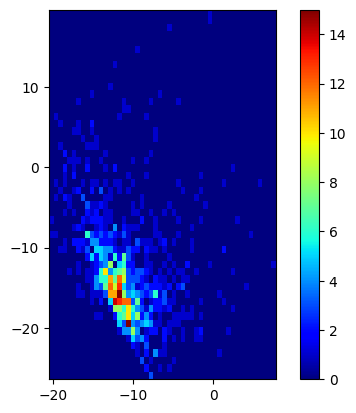

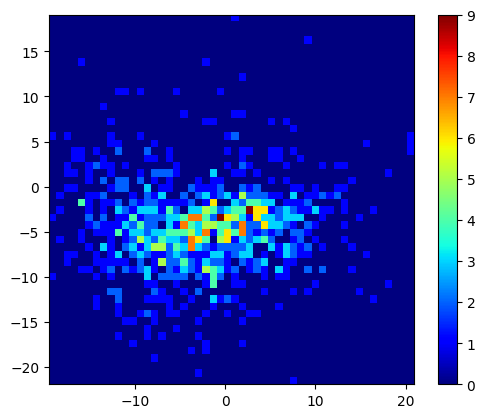

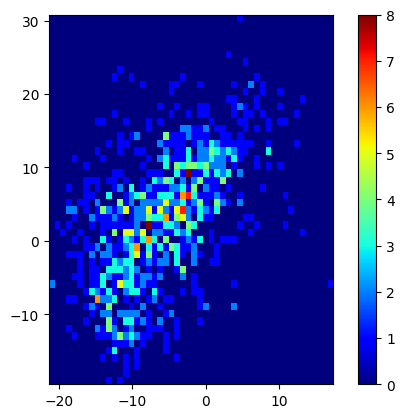

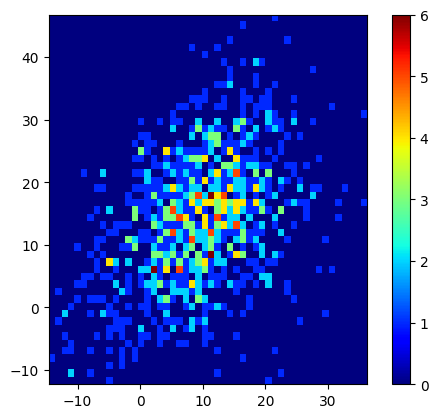

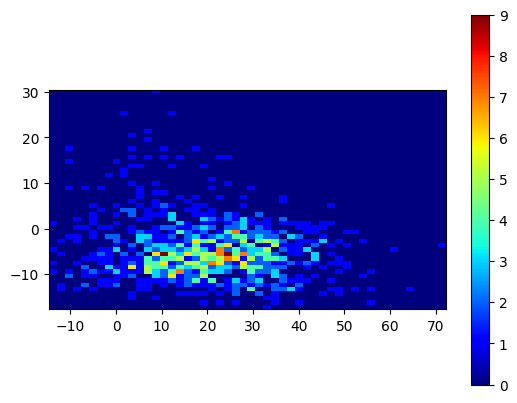

In [ ]:
newmodel2 = Model(inputs=model.layers[0].input, outputs=model.get_layer('dense_1').output)#dense_1

#test_mid=newmodel2.predict(x_train)
#test_mid=np.squeeze(test_mid)
#test_mid=np.reshape(test_mid,(test_mid.shape[0],-1))
#print(np.shape(test_mid))
test_mid=newmodel2.predict(x_test)
pca = PCA(n_components=2)
test_mid2=pca.fit_transform(test_mid)
#scaler = preprocessing.StandardScaler().fit(test_mid)
#test_mid2 = scaler.transform(test_mid)
print(np.shape(test_mid))
#for i in range(0,32):#10):
for i in range(0,10):
    plt.figure()
    a=test_mid[y_test[:,0]==i,:]
    #a=test_mid[y_train[:,0]==i,:]
    b=a[a[:,15]>0,15]
    #plt.hist(np.transpose(b),bins=100,alpha=0.3)
    #plt.plot(np.transpose(a[::100,:]))
    #plt.scatter((test_mid[y_test[:,0]==i,4]),(test_mid[y_test[:,0]==i,14]))
    #plt.hist(test_mid[y_test[:,0]==j,i],bins=100)
    #print(test_mid2[y_test_save==i,:])
    #plt.figure()
    plt.scatter(test_mid2[y_train[:,0]==i,0],test_mid2[y_train[:,0]==i,1],s=0.01)
    #plt.scatter(test_mid2[y_test[:,0]==i,0],test_mid2[y_test[:,0]==i,1],s=0.1)

    #heatmap, xedges, yedges = np.histogram2d(test_mid2[y_test[:,0]==i,0],test_mid2[y_test[:,0]==i,1], bins=50)
    #heatmap, xedges, yedges = np.histogram2d(test_mid2[y_train[:,0]==i,0],test_mid2[y_train[:,0]==i,1], bins=50)

    #extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    #plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='jet')
    #plt.colorbar()
plt.show()